In [1]:
from __future__ import division
from importlib import reload
from modules import * 
import pickle
import csv
fig_savedir = '../data/figures/'

In [2]:
grid_params = {
    'y_height':     20, 
    'x_width':      20,
    'maze_type':    'none',
    'step_penaliz': -0.01   
}

#make environment
maze = eu.gridworld(grid_params)

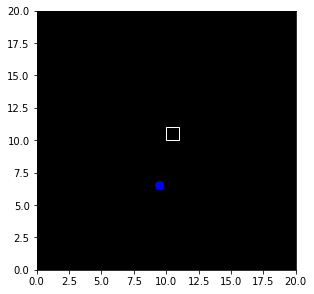

In [3]:
agent_params = {
        'load_model':   False,
        'load_dir':     '../data/outputs/gridworld/openfield{}{}.pt'.format(grid_params['x_width'],grid_params['y_height']),
        'rwd_placement':'training_loc',
        
        'state_type':   'conv',
        'lin_dims':     500,
        'rfsize':       10,
        'stride':       1,
        'action_dims':  len(maze.actionlist),
        'temperature':  1,
    
        'batch_size':   1,
        'gamma':        0.98, #discount factor
        'eta':          5e-4,
        
        'use_EC':       True,
        'cachelim':     300, # memory limit should be ~75% of #actions x #states
        'EC':           {},
        'mem_temp':     0.3
        
    }
run_dict = ac.reset_agt(maze, agent_params)

if agent_params['use_EC']:
    #agent_params['cachelim'] = int(0.5*np.prod(maze.grid.shape))
    agent_params['EC'] = ec.ep_mem(run_dict['agent'],agent_params['cachelim'])

gp.plot_env(run_dict['environment'])